## Scraping a PDF

#### Install libraries

In [1]:
import fitz  # PyMuPDF


import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action ="ignore", category=FutureWarning)

In [2]:
pdf = "Volume-1.pdf"
doc = fitz.open(pdf)

report = ""

# Loop through each page and extract text
for page in doc:
    page_text = page.get_text()
    raw_text = page_text.replace('\n', ' ')  # Remove line breaks
    report += raw_text   # Adds no a space between pages

doc.close()

## Preprocessing Pipeline

In [3]:
import re

In [4]:
def clean_text(text):
    text = re.sub('\xa0', ' ', text)
    text = re.sub('\n•', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\ue080', ' ', text)
    text = re.sub('\x0c', ' ', text)
    html = re.compile('[<,#*?>]')
    text = html.sub(r' ',text)
    url = re.compile('https?://\S+|www\.S+')
    text = url.sub(r' ',text)
    email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
    text = email.sub(r' ',text)
    return text

#aican = clean_text(aican)

In [5]:
report = clean_text(report)
report

'A INSURANCE CASES DIGEST - VOLUME 1  2024 Editorial - Editor’s Note CASES DIGEST •  INSURANCE  • VOLUME 1  2025 X  @IraUganda  Y  IRA UGANDA  F  irauganda  L  IraUganda Driving  Insurance  Growth CHIEF EXECUTIVE OFFICER’S  NOTE 3 Foreword  4 Editorial Note  5 Editorial Team 6 COURT CASES 7 I.\t LEADS INSURANCE  LIMITED V INSURANCE  REGULATORY  AUTHORITY OF UGANDA  MISCELLANEOUS CAUSE  NO. 1 OF 2013. 8 II.\t INSURANCE COMPANY  OF EAST AFRICA vs  KITAGENDA MUHAMMED  CIVIL SUIT NO 301 OF 2012. 10 III.\t ATTORNEY GENERAL  VERSUS NIKO INSURANCE  UGANDA LTD HCCS NO  240 OF 2012 11 IV.\t ISAAC KATONGOLE  VERSUS EXCEL  INSURANCE COMPANY  LTD HCCS NO 0176 OF  2012 13 V.\t GOLDSTAR INSURANCE  COMPANY LTD VERSUS  THE ATTORNEY GENERAL   SOUTHERN UNION  INSURANCE BROKERS LTD  & MULOWOOZA & BROS   CIVIL SUIT NO 132 OF 2010 14 VI.\t MICROCARE INSURANCE  LTD VERSUS INSURANCE  REGULATORY AUTHORITY  OF UGANDA CIVIL SUIT NO  684 OF 2015 15 INSURANCE REGULATORY  AUTHORITY OF UGANDA  COMPLAINTS BUREAU CAS

## Processing Pipeline for Word Tokenization

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import svgling
import string

import warnings


In [7]:
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download("maxent_ne_chunker_tab")
nltk.download("words")

[nltk_data] Downloading package stopwords to C:\Users\Andrew
[nltk_data]     KalumbaHarris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Andrew
[nltk_data]     KalumbaHarris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Andrew
[nltk_data]     KalumbaHarris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andrew
[nltk_data]     KalumbaHarris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Andrew
[nltk_data]     KalumbaHarris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nl

True

In [8]:
def token_creator(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()

    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    pos_tags = pos_tag(lowercase_tokens)

    named_entities = ne_chunk(pos_tags)

    return named_entities, pos_tags, lowercase_tokens, stemmed_tokens

In [9]:
report_named_entities, report_pos_tags, report_lowercase_tokens, report_stemmed_tokens = token_creator(report)

In [10]:
#report_stemmed_tokens

In [11]:
#report_pos_tags

## Sentence Tokenization

In [12]:
from nltk.tokenize import sent_tokenize


In [13]:
def token_sent_creator(clean_text):

    sentences = sent_tokenize(clean_text)
    sentences = [sent.lower().replace(".", "") for sent in sentences]
    return sentences

In [14]:
report_sentence = token_sent_creator(report)
report_sentence

['a insurance cases digest - volume 1  2024 editorial - editor’s note cases digest •  insurance  • volume 1  2025 x  @irauganda  y  ira uganda  f  irauganda  l  irauganda driving  insurance  growth chief executive officer’s  note 3 foreword  4 editorial note  5 editorial team 6 court cases 7 i',
 'leads insurance  limited v insurance  regulatory  authority of uganda  miscellaneous cause  no',
 '1 of 2013',
 '8 ii',
 'insurance company  of east africa vs  kitagenda muhammed  civil suit no 301 of 2012',
 '10 iii',
 'attorney general  versus niko insurance  uganda ltd hccs no  240 of 2012 11 iv',
 'isaac katongole  versus excel  insurance company  ltd hccs no 0176 of  2012 13 v\t goldstar insurance  company ltd versus  the attorney general   southern union  insurance brokers ltd  & mulowooza & bros   civil suit no 132 of 2010 14 vi',
 'microcare insurance  ltd versus insurance  regulatory authority  of uganda civil suit no  684 of 2015 15 insurance regulatory  authority of uganda  complai

In [15]:
report_lowercase_tokens = token_creator(report)

## Word Count

In [16]:

from nltk.probability import FreqDist

In [17]:
#from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Extract only the first element of each tuple (the word)
tokens = [w[0] if isinstance(w, tuple) else w for sublist in report_lowercase_tokens for w in sublist]

# Filter out non-alphabetic words and stopwords
filtered_tokens = [w for w in tokens if isinstance(w, str) and w.isalpha() and w not in stop_words]

# Frequency distribution
wc = FreqDist(filtered_tokens)

top_words = pd.DataFrame(wc.most_common(20), columns=['Word', 'Frequency'])


In [18]:
import matplotlib.pyplot as plt

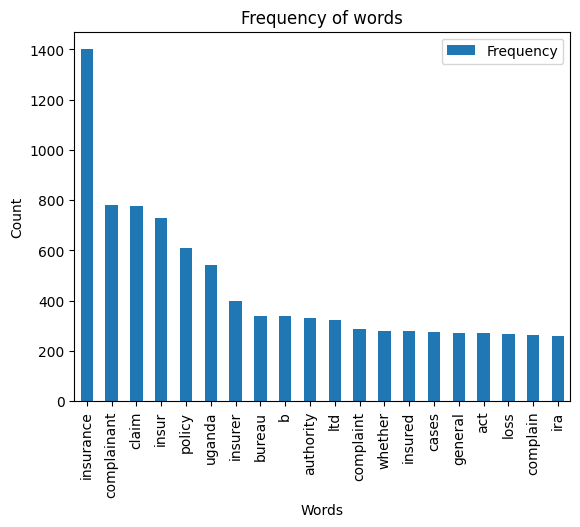

In [19]:
top_words.plot(x="Word", kind='bar')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Frequency of words')
plt.xticks(rotation = 90)
plt.show()

## Word Cloud

In [20]:
from wordcloud import WordCloud

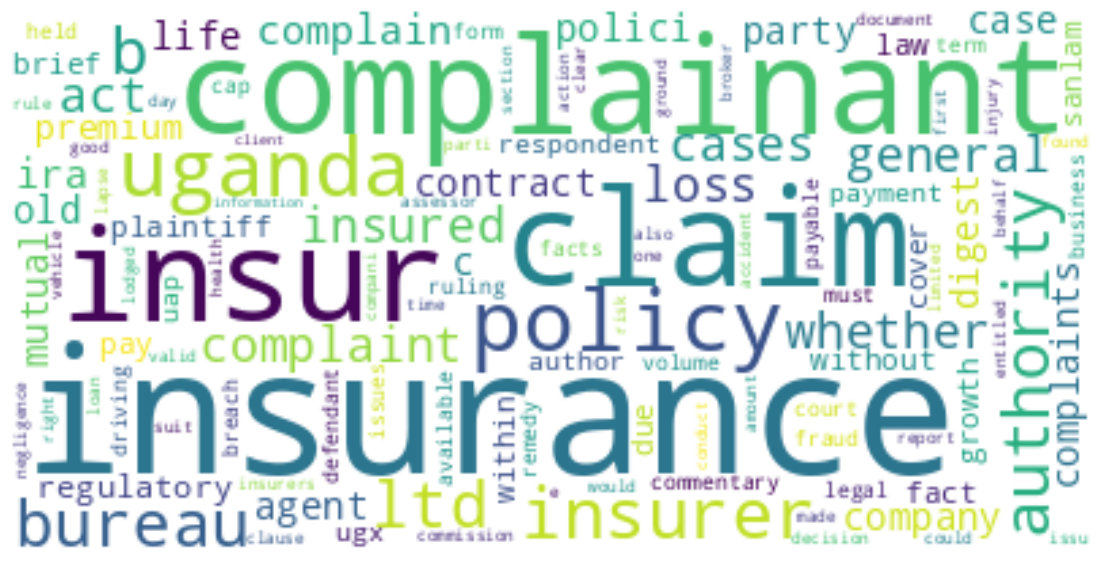

In [21]:
fig = plt.figure(figsize=(14, 18))

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wc))

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Author

<a href="https://www.linkedin.com/in/andrew-kalumba-harris/">Andrew Kalumba</a><br>
<a href =""> </a>


| Date (YYYY-MM-DD) | Prepared By     | 
| ----------------- | --------------  | 
| 2025-11-21        | Author          | 


## <h3 align="center"> © Data Science 2025. . <h3/>